In [343]:
#Importing nessesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [344]:
#load datasets
bank_transactions = pd.read_csv("bank_transaction.csv")
user_profiles = pd.read_csv("user_profile.csv")

In [345]:
print(bank_transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258779 entries, 0 to 258778
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   client_id    258779 non-null  int64  
 1   bank_id      258779 non-null  int64  
 2   account_id   258779 non-null  int64  
 3   txn_id       258779 non-null  int64  
 4   txn_date     258779 non-null  object 
 5   description  258779 non-null  object 
 6   amount       258779 non-null  float64
 7   category     258522 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 15.8+ MB
None


In [346]:
print(user_profiles.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   CLIENT_ID                      1000 non-null   int64
 1   IS_INTERESTED_INVESTMENT       1000 non-null   bool 
 2   IS_INTERESTED_BUILD_CREDIT     1000 non-null   bool 
 3   IS_INTERESTED_INCREASE_INCOME  1000 non-null   bool 
 4   IS_INTERESTED_PAY_OFF_DEBT     1000 non-null   bool 
 5   IS_INTERESTED_MANAGE_SPENDING  1000 non-null   bool 
 6   IS_INTERESTED_GROW_SAVINGS     1000 non-null   bool 
dtypes: bool(6), int64(1)
memory usage: 13.8 KB
None


In [347]:
#to lower all colmun for easier data analyse and processing down the line
user_profiles.rename(columns=str.lower, inplace=True)

# convert boolean columns to binary in user profiles
boolean_columns = user_profiles.select_dtypes(include=['bool']).columns
user_profiles[boolean_columns] = user_profiles[boolean_columns].astype(int)

In [348]:
bank_transactions.describe(include='all').style.background_gradient(cmap='Blues')

,client_id,bank_id,account_id,txn_id,txn_date,description,amount,category
count,258779.000000,258779.000000,258779.000000,258779.000000,258779,258779,258779.000000,258522
unique,nan,nan,nan,nan,7183,102108,nan,33
top,nan,nan,nan,nan,2023-09-05 00:00:00,CHECK111,nan,Uncategorized
freq,nan,nan,nan,nan,5580,6697,nan,29392
mean,747.287771,344.082499,393.475355,70141.685655,nan,nan,2.544952,nan
std,253.470559,317.796823,365.154751,63134.367678,nan,nan,81.132139,nan
min,1.000000,1.000000,1.000000,1.000000,nan,nan,-9162.460000,nan
25%,805.000000,2.000000,2.000000,212.000000,nan,nan,-6.000000,nan
50%,880.000000,292.000000,328.000000,61116.000000,nan,nan,-1.876000,nan
75%,880.000000,608.000000,701.000000,125810.500000,nan,nan,2.000000,nan


In [349]:
print(user_profiles.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   client_id                      1000 non-null   int64
 1   is_interested_investment       1000 non-null   int32
 2   is_interested_build_credit     1000 non-null   int32
 3   is_interested_increase_income  1000 non-null   int32
 4   is_interested_pay_off_debt     1000 non-null   int32
 5   is_interested_manage_spending  1000 non-null   int32
 6   is_interested_grow_savings     1000 non-null   int32
dtypes: int32(6), int64(1)
memory usage: 31.4 KB
None


In [350]:
# Check for missing values
print("\nMissing Values in Bank Transactions:")
print(bank_transactions.isnull().sum())

print("\nMissing Values in User Profiles:")
print(user_profiles.isnull().sum())


Missing Values in Bank Transactions:
client_id        0
bank_id          0
account_id       0
txn_id           0
txn_date         0
description      0
amount           0
category       257
dtype: int64

Missing Values in User Profiles:
client_id                        0
is_interested_investment         0
is_interested_build_credit       0
is_interested_increase_income    0
is_interested_pay_off_debt       0
is_interested_manage_spending    0
is_interested_grow_savings       0
dtype: int64


In [351]:
# corious about why the categories where NAs
missing_categories = bank_transactions[bank_transactions['category'].isnull()]

In [352]:
# see if it's only certain clients
print(missing_categories["client_id"].value_counts())
print("\n")
print(missing_categories["description"].value_counts())

client_id
880    186
788     71
Name: count, dtype: int64


description
Transfer from Chime Savings Account                                                                    116
Dandy Mini Mart                                                                                         28
Dunkin Donuts                                                                                           14
Transfer to Chime Savings Account                                                                       13
McDonald's                                                                                              13
Cash App*Maryse Hemant                                                                                  11
ATM Withdrawal                                                                                          10
Cash app*cash out      visa direct  caus                                                                 9
Wendy's                                                                 

In [353]:
# Using account ID instead of client id
print(missing_categories["account_id"].value_counts())

account_id
994    180
1       71
32       6
Name: count, dtype: int64


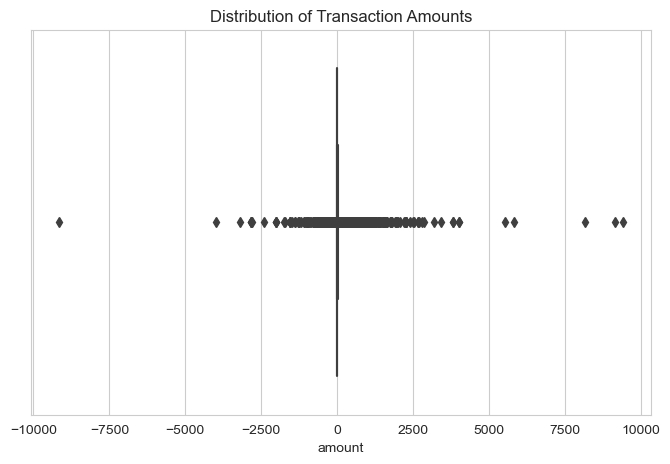

In [354]:
# Check for outliers in the 'amount' column
plt.figure(figsize=(8, 5))
sns.boxplot(data=bank_transactions, x='amount')
plt.title('Distribution of Transaction Amounts')
plt.show()

In [355]:
# Check the date range of the transactions
print("\nDate Range of Transactions:")
bank_transactions['txn_date'] = pd.to_datetime(bank_transactions['txn_date'])
print(f"Start Date: {bank_transactions['txn_date'].min()}")
print(f"End Date: {bank_transactions['txn_date'].max()}")


Date Range of Transactions:
Start Date: 2023-06-01 00:00:00
End Date: 2023-09-30 00:00:00


In [356]:
# Analyze spending habits by grouping by 'client_id'
user_spending = bank_transactions.groupby('client_id')['amount'].agg(['count', 'sum', 'mean', 'median', 'std'])

In [357]:
# Filter only spending transactions (negative amounts)
spending_transactions = bank_transactions[bank_transactions['amount'] < 0]

In [358]:
spending_transactions["account_id"].value_counts()

account_id
74      1049
495      852
704      839
514      775
2        736
        ... 
380        1
1056       1
361        1
491        1
169        1
Name: count, Length: 1129, dtype: int64

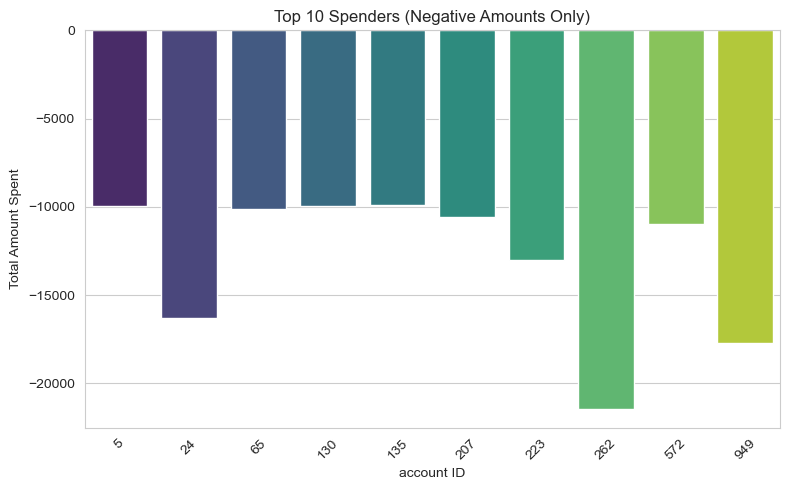

In [359]:
# Top spenders based on spending (negative amounts)
top_spenders = spending_transactions.groupby('account_id')['amount'].sum().sort_values().head(10)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_spenders.index, y=top_spenders.values, palette='viridis')
plt.title('Top 10 Spenders (Negative Amounts Only)')
plt.xlabel('account ID')
plt.ylabel('Total Amount Spent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

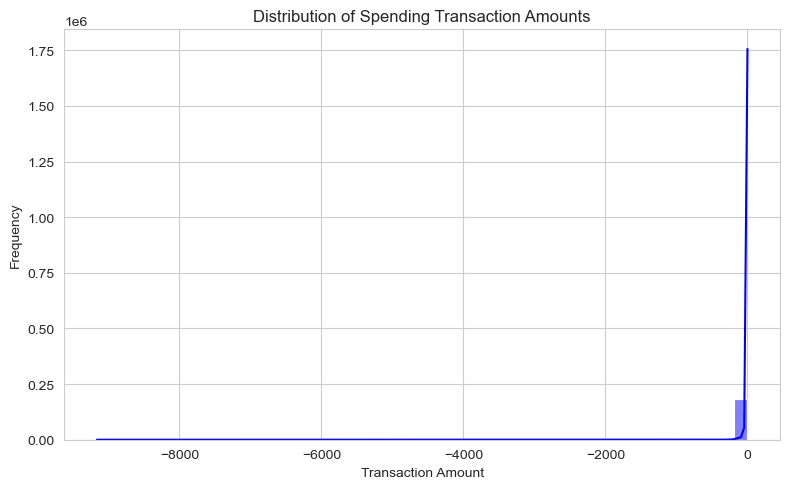

In [360]:
# Spending distribution (negative amounts only)
plt.figure(figsize=(8, 5))
sns.histplot(spending_transactions['amount'], bins=50, kde=True, color='blue')
plt.title('Distribution of Spending Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

C:\Users\Ze Ki\AppData\Local\Temp\ipykernel_10612\2101924379.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spending_transactions['week'] = spending_transactions['txn_date'].dt.to_period('W').apply(lambda r: r.start_time)


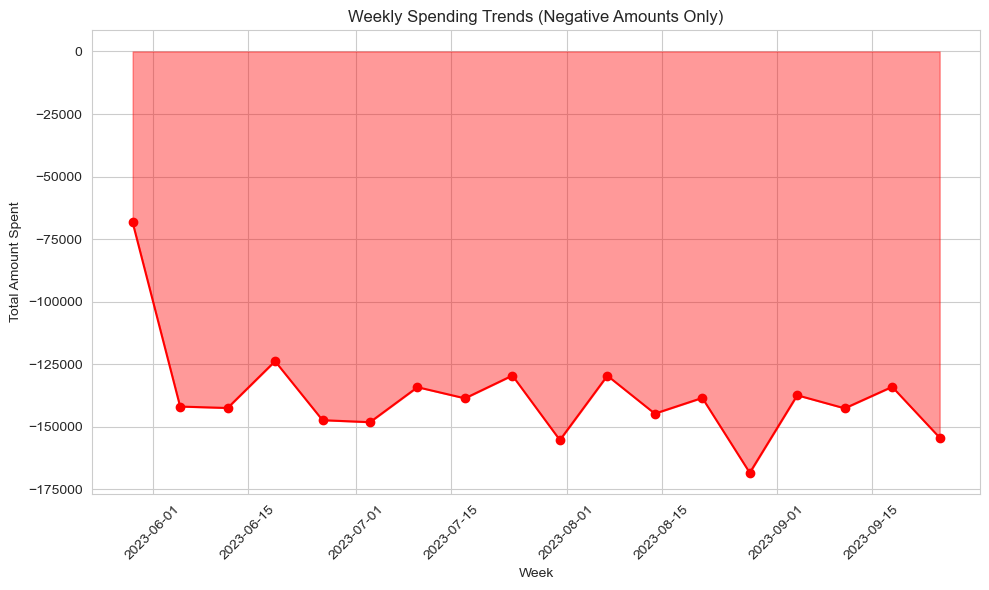

In [361]:
# Group by week and calculate total spending per week
spending_transactions['week'] = spending_transactions['txn_date'].dt.to_period('W').apply(lambda r: r.start_time)
weekly_spending = spending_transactions.groupby('week')['amount'].sum()

# Plotting weekly spending with a line/area graph
plt.figure(figsize=(10, 6))
plt.fill_between(weekly_spending.index, weekly_spending, alpha=0.4, color='red')
plt.plot(weekly_spending.index, weekly_spending, marker='o', color='red')
plt.title('Weekly Spending Trends (Negative Amounts Only)')
plt.xlabel('Week')
plt.ylabel('Total Amount Spent')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

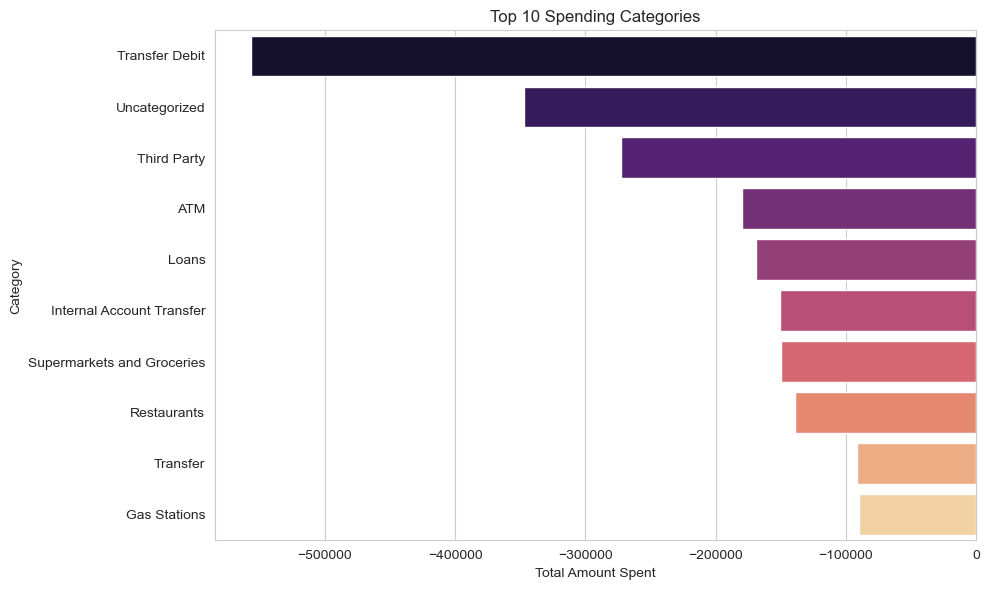

In [362]:
# Spending by category (negative amounts only)
plt.figure(figsize=(10, 6))
spending_by_category = spending_transactions.groupby('category')['amount'].sum().sort_values().head(10)
sns.barplot(x=spending_by_category.values, y=spending_by_category.index, palette='magma')
plt.title('Top 10 Spending Categories')
plt.xlabel('Total Amount Spent')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

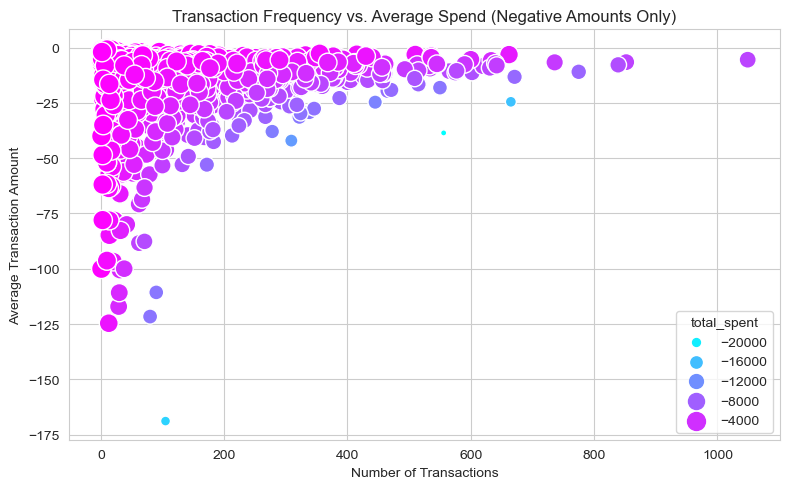

In [363]:
# Transaction frequency vs average spend (negative amounts only)
user_transaction_analysis = spending_transactions.groupby('account_id').agg({'amount': ['count', 'mean', 'sum']})
user_transaction_analysis.columns = ['transaction_count', 'average_spent', 'total_spent']

plt.figure(figsize=(8, 5))
sns.scatterplot(data=user_transaction_analysis, x='transaction_count', y='average_spent', hue='total_spent', palette='cool', size='total_spent', sizes=(20, 200))
plt.title('Transaction Frequency vs. Average Spend (Negative Amounts Only)')
plt.xlabel('Number of Transactions')
plt.ylabel('Average Transaction Amount')
plt.tight_layout()
plt.show()

In [364]:
temp_user_profile =  pd.read_csv("user_profile.csv")
boolean_columns = temp_user_profile.select_dtypes(include=['bool']).columns

# Calculate the proportion of True (1) and False (0) values for each boolean column
boolean_summary = pd.DataFrame.from_records([
    {
        'Feature': col,
        'True': temp_user_profile[col].sum(),
        'False': len(temp_user_profile) - temp_user_profile[col].sum(),
        'True %': temp_user_profile[col].mean() * 100,
        'False %': (1 - temp_user_profile[col].mean()) * 100
    }
    for col in boolean_columns
])

# Display the summary as a table
print(boolean_summary)

                         Feature  True  False  True %  False %
0       IS_INTERESTED_INVESTMENT    57    943     5.7     94.3
1     IS_INTERESTED_BUILD_CREDIT    27    973     2.7     97.3
2  IS_INTERESTED_INCREASE_INCOME    92    908     9.2     90.8
3     IS_INTERESTED_PAY_OFF_DEBT    42    958     4.2     95.8
4  IS_INTERESTED_MANAGE_SPENDING    50    950     5.0     95.0
5     IS_INTERESTED_GROW_SAVINGS    46    954     4.6     95.4


<Figure size 1200x600 with 0 Axes>

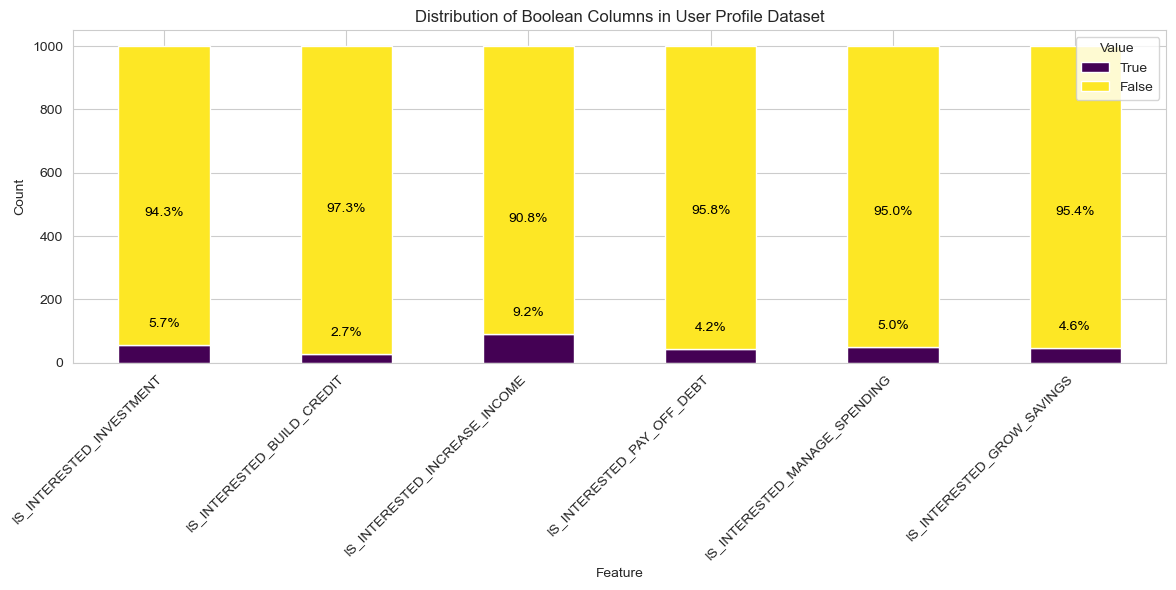

In [365]:
# Visualize the breakdown of boolean columns
plt.figure(figsize=(12, 6))
boolean_summary.set_index('Feature')[['True', 'False']].plot(
    kind='bar', stacked=True, colormap='viridis', figsize=(12, 6)
)
plt.title('Distribution of Boolean Columns in User Profile Dataset')
plt.xlabel('Feature')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Value', loc='upper right')

# Add percentage labels to bars
for i, row in boolean_summary.iterrows():
    plt.text(i, row['True'] + row['False'] / 20, f"{row['True %']:.1f}%", ha='center', va='bottom', color='black')
    plt.text(i, row['False'] / 2, f"{row['False %']:.1f}%", ha='center', va='center', color='black')

plt.tight_layout()
plt.show()

In [366]:
# convert transaction_date to datetime format
bank_transactions['txn_date'] = pd.to_datetime(bank_transactions['txn_date'])

# Handling missing values in the 'category' column
# Strategy: For now, drop rows with missing 'category'
bank_transactions = bank_transactions.dropna(subset=['category'])

# merge spending transactions with user profiles on 'user_id'
merged_data = pd.merge(bank_transactions, user_profiles, on='client_id', how='left')

In [367]:
wip_data = merged_data

Lower Bound: -26.0
Upper Bound: 22.0


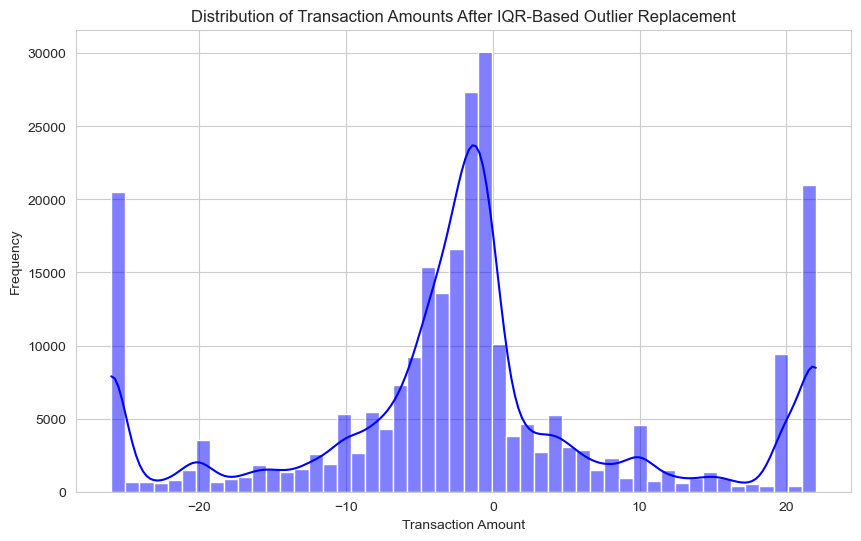

Summary Statistics After IQR-Based Outlier Replacement:
count    258522.000000
mean         -1.630024
std          12.220151
min         -26.000000
25%          -6.000000
50%          -1.880000
75%           2.000000
max          22.000000
Name: amount, dtype: float64


In [368]:
# Calculate IQR and bounds
q1 = wip_data['amount'].quantile(0.25)
q3 = wip_data['amount'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 2.5 * iqr
upper_bound = q3 + 2.5 * iqr

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

# Replace outliers with the IQR bounds
wip_data['amount'] = np.where(
    wip_data['amount'] < lower_bound, lower_bound, wip_data['amount']
)
wip_data['amount'] = np.where(
    wip_data['amount'] > upper_bound, upper_bound, wip_data['amount']
)

# Visualize the distribution after outlier replacement
plt.figure(figsize=(10, 6))
sns.histplot(wip_data['amount'], bins=50, kde=True, color='blue')
plt.title('Distribution of Transaction Amounts After IQR-Based Outlier Replacement')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

# Show summary statistics to verify the replacement
print("Summary Statistics After IQR-Based Outlier Replacement:")
print(wip_data['amount'].describe())

Number of Values Capped at Lower Bound (-26.0): 20161 (7.80%)
Number of Values Capped at Upper Bound (22.0): 20764 (8.03%)


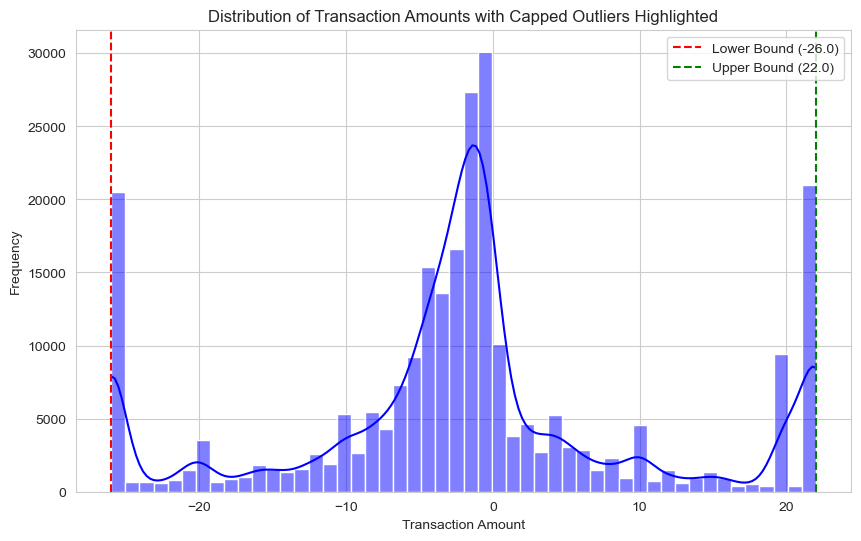

Summary Statistics After IQR-Based Outlier Replacement:
count    258522.000000
mean         -1.630024
std          12.220151
min         -26.000000
25%          -6.000000
50%          -1.880000
75%           2.000000
max          22.000000
Name: amount, dtype: float64


In [369]:
# Calculate the number of capped values
lower_bound_capped = (wip_data['amount'] == lower_bound).sum()
upper_bound_capped = (wip_data['amount'] == upper_bound).sum()

# Calculate the percentage of capped values
total_data_points = len(wip_data)
lower_bound_percentage = (lower_bound_capped / total_data_points) * 100
upper_bound_percentage = (upper_bound_capped / total_data_points) * 100

print(f"Number of Values Capped at Lower Bound ({lower_bound}): {lower_bound_capped} ({lower_bound_percentage:.2f}%)")
print(f"Number of Values Capped at Upper Bound ({upper_bound}): {upper_bound_capped} ({upper_bound_percentage:.2f}%)")

# Visualization of capped values
plt.figure(figsize=(10, 6))
sns.histplot(wip_data['amount'], bins=50, kde=True, color='blue')
plt.axvline(lower_bound, color='red', linestyle='--', label=f'Lower Bound ({lower_bound})')
plt.axvline(upper_bound, color='green', linestyle='--', label=f'Upper Bound ({upper_bound})')
plt.title('Distribution of Transaction Amounts with Capped Outliers Highlighted')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Summary of the impact of capping
print("Summary Statistics After IQR-Based Outlier Replacement:")
print(merged_data['amount'].describe())

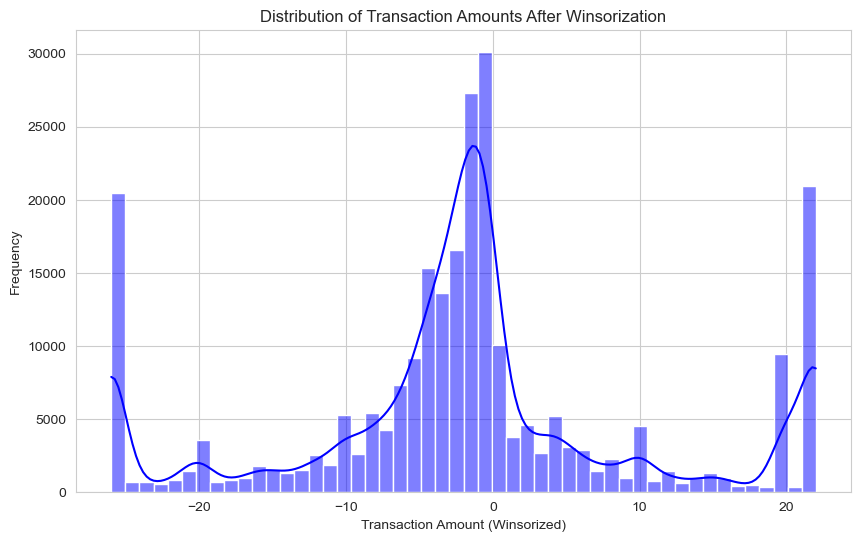

Summary Statistics Before Winsorization:
count    258522.000000
mean         -1.630024
std          12.220151
min         -26.000000
25%          -6.000000
50%          -1.880000
75%           2.000000
max          22.000000
Name: amount, dtype: float64

Summary Statistics After Winsorization:
count    258522.000000
mean         -1.630024
std          12.220151
min         -26.000000
25%          -6.000000
50%          -1.880000
75%           2.000000
max          22.000000
Name: amount_winsorized, dtype: float64


c:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


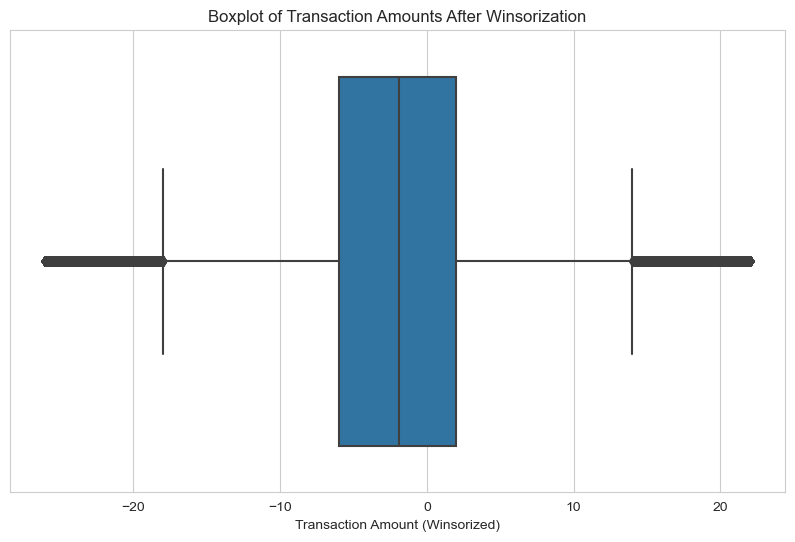

In [370]:
from scipy.stats import mstats

# Apply Winsorization to the 'amount' column
merged_data['amount_winsorized'] = mstats.winsorize(merged_data['amount'], limits=[0.02, 0.02])

# Visualization of the winsorized distribution
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['amount_winsorized'], bins=50, kde=True, color='blue')
plt.title('Distribution of Transaction Amounts After Winsorization')
plt.xlabel('Transaction Amount (Winsorized)')
plt.ylabel('Frequency')
plt.show()

# Compare summary statistics
print("Summary Statistics Before Winsorization:")
print(merged_data['amount'].describe())

print("\nSummary Statistics After Winsorization:")
print(merged_data['amount_winsorized'].describe())

# Boxplot to visualize the effect of Winsorization
plt.figure(figsize=(10, 6))
sns.boxplot(x=merged_data['amount_winsorized'])
plt.title('Boxplot of Transaction Amounts After Winsorization')
plt.xlabel('Transaction Amount (Winsorized)')
plt.show()

In [371]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

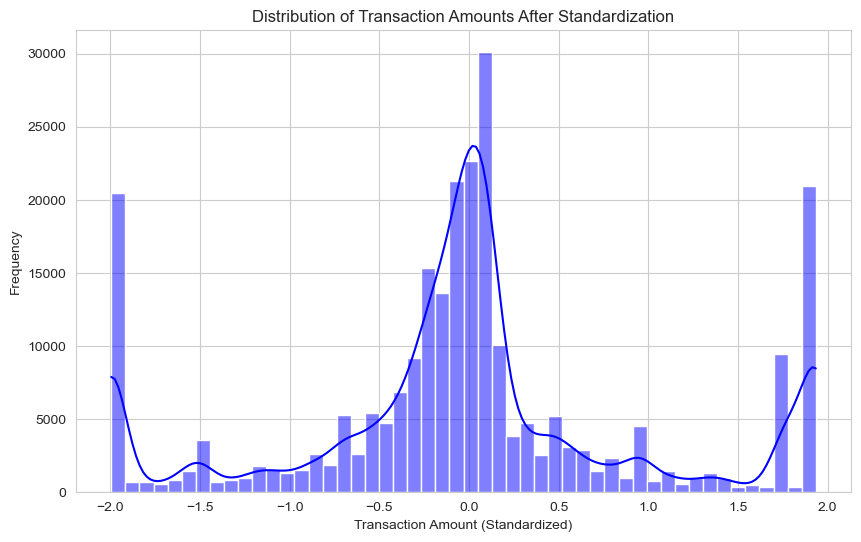

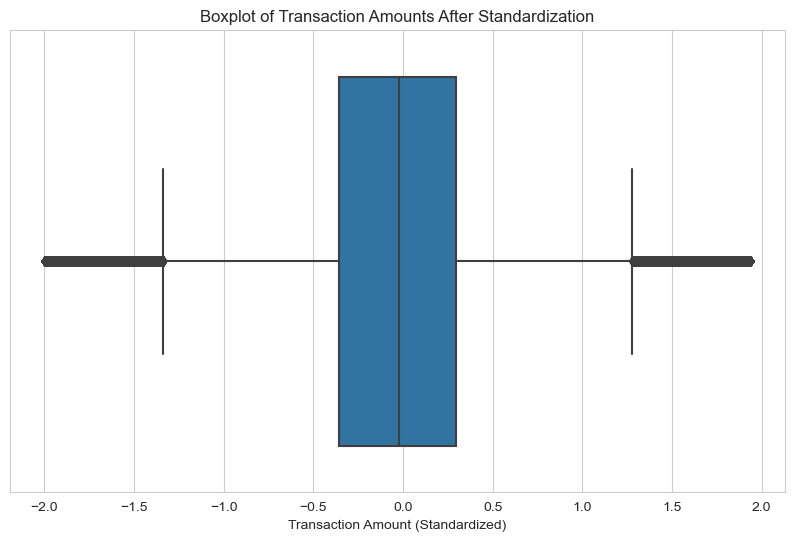

Summary Statistics After Standardization:
count    2.585220e+05
mean     1.407222e-17
std      1.000002e+00
min     -1.994249e+00
25%     -3.576048e-01
50%     -2.045609e-02
75%      2.970529e-01
max      1.933697e+00
Name: amount_standardized, dtype: float64


In [372]:
# Choose Standardization
scaler = StandardScaler()

# Apply Standardization to the 'amount' column
merged_data['amount_standardized'] = scaler.fit_transform(merged_data[['amount_winsorized']])

# Visualization of the standardized distribution
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['amount_standardized'], bins=50, kde=True, color='blue')
plt.title('Distribution of Transaction Amounts After Standardization')
plt.xlabel('Transaction Amount (Standardized)')
plt.ylabel('Frequency')
plt.show()

# Boxplot to visualize the standardized data
plt.figure(figsize=(10, 6))
sns.boxplot(x=merged_data['amount_standardized'])
plt.title('Boxplot of Transaction Amounts After Standardization')
plt.xlabel('Transaction Amount (Standardized)')
plt.show()

# Summary statistics of the standardized data
print("Summary Statistics After Standardization:")
print(merged_data['amount_standardized'].describe())

In [373]:
from sklearn.preprocessing import LabelEncoder

In [374]:
model_data = merged_data.copy()

# 1. Extract date-based features
model_data['transaction_day_of_week'] = model_data['txn_date'].dt.dayofweek
model_data['transaction_month'] = model_data['txn_date'].dt.month
model_data['transaction_day'] = model_data['txn_date'].dt.day
model_data['is_weekend'] = model_data['transaction_day_of_week'].isin([5, 6]).astype(int)

# 2. Create a binary feature for spending vs. income
model_data['is_spending'] = (model_data['amount_standardized'] < 0).astype(int)

label_encoder = LabelEncoder()

# 3. One-Hot Encoding for categorical features
model_data['category_encoded'] = label_encoder.fit_transform(model_data['category'])

# 4. Prepare the final feature set and target variable
feature_columns = [col for col in model_data.columns if col not in ['amount','client_id','bank_id','txn_id','account_id','description', 'amount_winsorized', 'txn_date', 'user_id', 'category','category_encoded']]
target_column = 'category_encoded'

In [375]:
# Check the prepared features
print(f"Feature columns: {feature_columns}")
print(f"Number of features: {len(feature_columns)}")

Feature columns: ['is_interested_investment', 'is_interested_build_credit', 'is_interested_increase_income', 'is_interested_pay_off_debt', 'is_interested_manage_spending', 'is_interested_grow_savings', 'amount_standardized', 'transaction_day_of_week', 'transaction_month', 'transaction_day', 'is_weekend', 'is_spending']
Number of features: 12


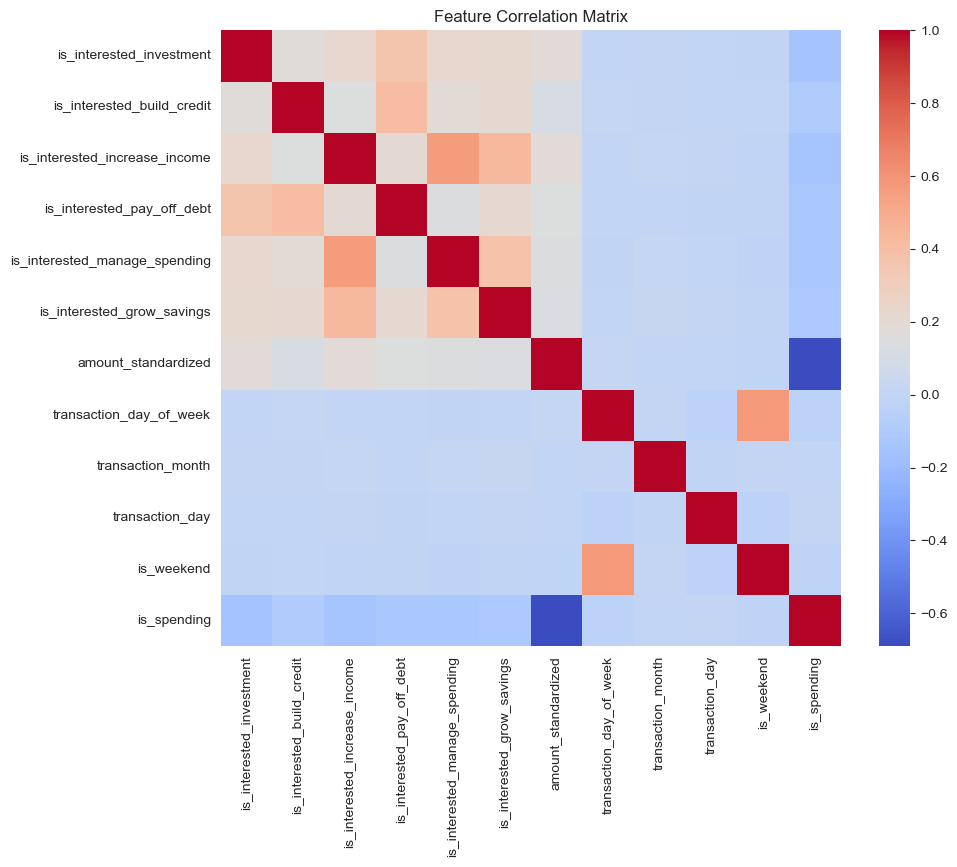

In [376]:
# Calculate correlation matrix
correlation_matrix = model_data[feature_columns].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Feature Correlation Matrix')
plt.show()

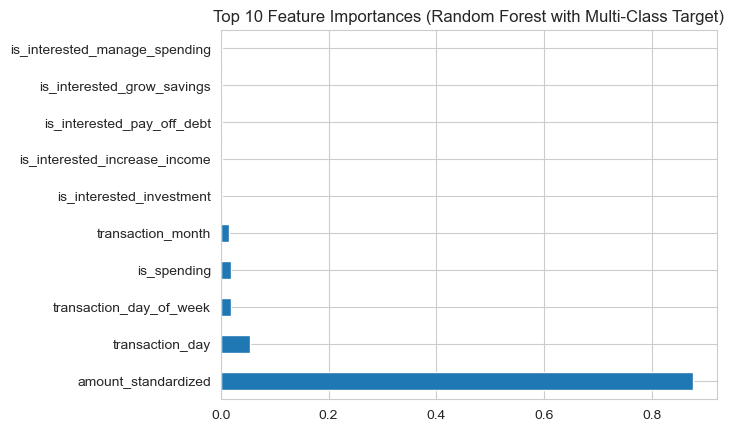

In [377]:
# Feature importance with Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(model_data[feature_columns], model_data[target_column])

# Plot feature importances
import pandas as pd
import matplotlib.pyplot as plt

feature_importances = pd.Series(rf_model.feature_importances_, index=feature_columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances (Random Forest with Multi-Class Target)')
plt.show()

In [378]:
feature_importances

is_interested_investment         0.003138
is_interested_build_credit       0.002381
is_interested_increase_income    0.002870
is_interested_pay_off_debt       0.002867
is_interested_manage_spending    0.002459
is_interested_grow_savings       0.002464
amount_standardized              0.876255
transaction_day_of_week          0.019214
transaction_month                0.014510
transaction_day                  0.053676
is_weekend                       0.001894
is_spending                      0.018272
dtype: float64

In [379]:
important_features = feature_importances[feature_importances > 0.01].index.tolist()
print("Selected Features for Modeling:", important_features)

Selected Features for Modeling: ['amount_standardized', 'transaction_day_of_week', 'transaction_month', 'transaction_day', 'is_spending']


In [380]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define feature columns and target variable
X = model_data[important_features]
y = model_data['category_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [381]:
# Dictionary to store model performance
model_performance = {}



# 1. Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate Logistic Regression
model_performance['Logistic Regression'] = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_logistic))

# 2. Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest
model_performance['Random Forest'] = accuracy_score(y_test, y_pred_rf)
print("\nRandom Forest Performance:")
print(classification_report(y_test, y_pred_rf))

In [382]:
# 3. XGBoost Classifier
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate XGBoost
model_performance['XGBoost'] = accuracy_score(y_test, y_pred_xgb)
print("\nXGBoost Performance:")
print(classification_report(y_test, y_pred_xgb))


XGBoost Performance:
              precision    recall  f1-score   support

           0       0.24      0.17      0.20      1134
           1       0.00      0.00      0.00        79
           2       0.00      0.00      0.00         7
           3       0.41      0.54      0.47      1286
           4       0.00      0.00      0.00        42
           5       0.20      0.01      0.02       638
           6       0.33      0.59      0.42      3726
           7       0.21      0.01      0.01       400
           8       0.25      0.13      0.17       905
           9       0.00      0.00      0.00        69
          10       0.28      0.41      0.33      2584
          11       0.00      0.00      0.00        14
          12       0.00      0.00      0.00        41
          13       0.00      0.00      0.00       351
          14       0.49      0.68      0.57        56
          15       0.23      0.02      0.03      2397
          16       0.43      0.46      0.44      3921
     

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Compare Model Performance
print("\nModel Performance Comparison:")
for model_name, accuracy in model_performance.items():
    print(f"{model_name}: Accuracy = {accuracy:.4f}")

# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix (XGBoost)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [383]:
model_data["category"].value_counts()

category
Uncategorized                 29392
Third Party                   28714
Restaurants                   26367
Transfer Credit               21561
Loans                         19605
Convenience Stores            18630
Supermarkets and Groceries    16750
Transfer Debit                15114
Gas Stations                  12919
Internal Account Transfer     11983
Payroll                        8100
Shops                          7418
Bank Fees                      6432
Transfer                       6275
ATM                            5672
Transfer Deposit               4976
Digital Entertainment          4525
Utilities                      4118
Clothing and Accessories       3190
Department Stores              2002
Insurance                      1754
Service                         910
Arts and Entertainment          397
Travel                          367
Food and Beverage Services      343
Interest                        280
Check Deposit                   211
Healthcare         

In [384]:
cat_count = model_data.category.value_counts()

In [385]:
cat_count = model_data.category.value_counts()
# Identify categories with fewer than 500 data points
rare_categories = cat_count[cat_count < 500]

In [386]:
rare_categories

category
Arts and Entertainment        397
Travel                        367
Food and Beverage Services    343
Interest                      280
Check Deposit                 211
Healthcare                    207
Telecommunication Services    159
Gyms and Fitness Centers       69
Payment                        41
Bank Fee                       36
Tax Refund                      5
Name: count, dtype: int64

Before Adjusted SMOTE: (206817, 5) (206817,)
After Adjusted SMOTE: (752420, 5) (752420,)
XGBoost Performance with Adjusted SMOTE:
              precision    recall  f1-score   support

           0       0.15      0.44      0.23      1134
           1       0.02      0.29      0.03        79
           2       0.00      0.14      0.00         7
           3       0.36      0.61      0.45      1286
           4       0.01      0.33      0.02        42
           5       0.06      0.05      0.05       638
           6       0.31      0.53      0.39      3726
           7       0.05      0.17      0.08       400
           8       0.13      0.31      0.18       905
           9       0.01      0.23      0.02        69
          10       0.26      0.34      0.29      2584
          11       0.00      0.07      0.00        14
          12       0.00      0.10      0.01        41
          13       0.04      0.23      0.06       351
          14       0.30      0.79      0.43        56
     

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


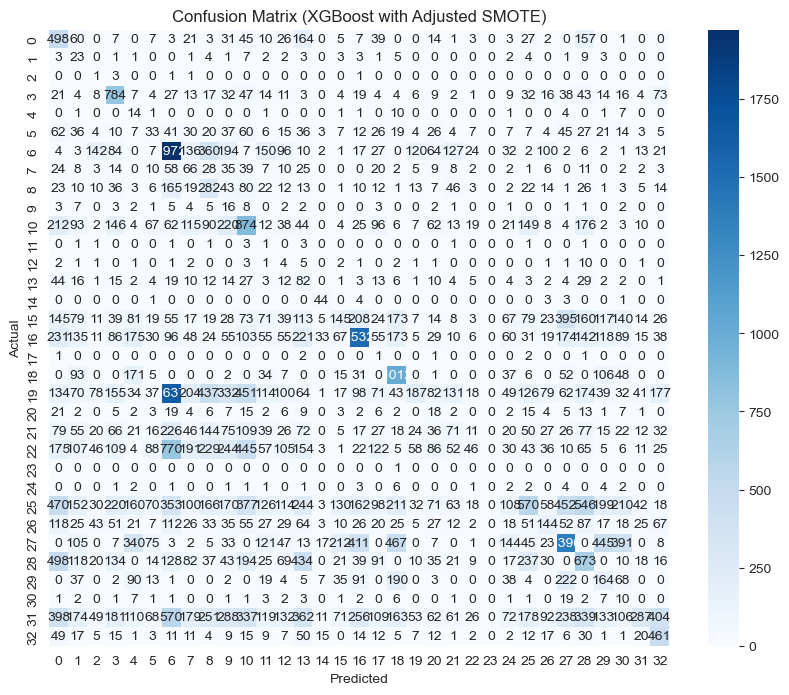

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE with adjusted sampling strategy
smote = SMOTE(sampling_strategy='not minority', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Before Adjusted SMOTE:", X_train.shape, y_train.shape)
print("After Adjusted SMOTE:", X_train_resampled.shape, y_train_resampled.shape)

# Retrain the XGBoost model with resampled data
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train_resampled, y_train_resampled)
y_pred_xgb_smote_adj = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost Performance with Adjusted SMOTE:")
print(classification_report(y_test, y_pred_xgb_smote_adj))

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Low-Performance Category Indices (F1 score < 0.2): [1, 2, 4, 5, 7, 8, 9, 11, 12, 13, 15, 17, 19, 20, 21, 22, 23, 24, 25, 26, 29, 30, 31]
Categories to be dropped based on low performance: ['Arts and Entertainment' 'Bank Fee' 'Check Deposit'
 'Clothing and Accessories' 'Department Stores' 'Digital Entertainment'
 'Food and Beverage Services' 'Gyms and Fitness Centers' 'Healthcare'
 'Insurance' 'Internal Account Transfer' 'Payment' 'Restaurants' 'Service'
 'Shops' 'Supermarkets and Groceries' 'Tax Refund'
 'Telecommunication Services' 'Third Party' 'Transfer' 'Transfer Deposit'
 'Travel' 'Uncategorized']
After Dropping Low-Performance Categories and Applying SMOTE:
Training set size: (155465, 5) (155465,)
Test set size: (22487, 5) (22487,)
XGBoost Performance After Dropping Low-Performance Categories:
              precision    recall  f1-score   support

           0       0.30      0.67      0.41      1134
           1       0.57      0.64      0.60      1287
           2       0.82   

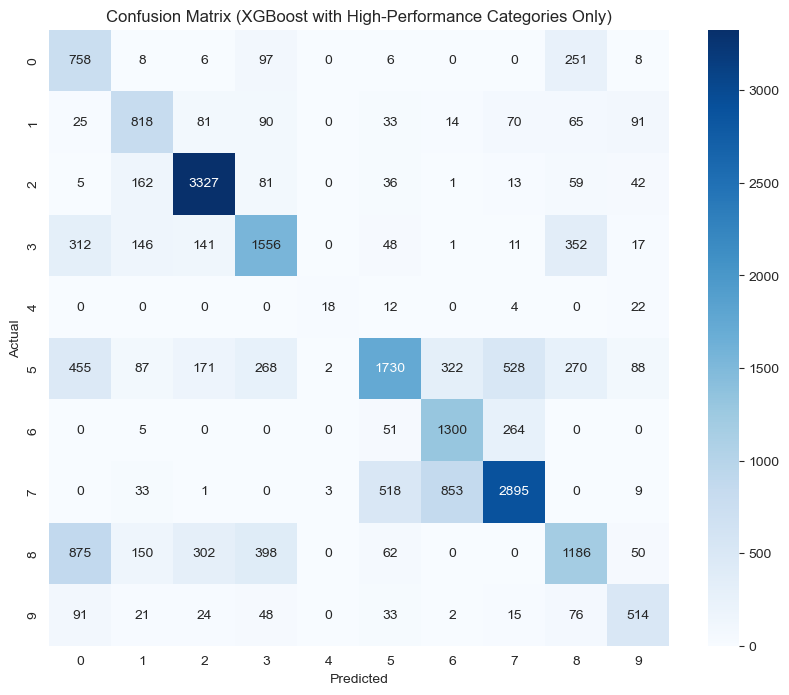

In [ ]:
# Get model predictions to analyze F1 scores
y_pred_xgb = xgb_model.predict(X_test)

# Generate a classification report as a dictionary
report = classification_report(y_test, y_pred_xgb, output_dict=True)

# Extract F1 scores for each class
f1_scores = {int(label): metrics['f1-score'] for label, metrics in report.items() if label.isdigit()}

# Define a threshold for low performance based on F1 score
f1_threshold = 0.2
low_performance_category_indices = [label for label, f1 in f1_scores.items() if f1 < f1_threshold]

print(f"Low-Performance Category Indices (F1 score < {f1_threshold}): {low_performance_category_indices}")

# Convert encoded categories back to original text labels
model_data['category_text'] = label_encoder.inverse_transform(model_data['category_encoded'])
low_performance_category_labels = label_encoder.inverse_transform(low_performance_category_indices)

print(f"Categories to be dropped based on low performance: {low_performance_category_labels}")

# Safely drop low-performance categories using text labels
model_data = model_data[~model_data['category_text'].isin(low_performance_category_labels)]

# Update feature and target sets
X = model_data[important_features]
y = model_data['category_text']

# Re-encode the target variable with LabelEncoder
label_encoder = LabelEncoder()
model_data['category_encoded'] = label_encoder.fit_transform(model_data['category_text'])
y = model_data['category_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


smote = SMOTE(sampling_strategy='not minority', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("After Dropping Low-Performance Categories and Applying SMOTE:")
print("Training set size:", X_train_resampled.shape, y_train_resampled.shape)
print("Test set size:", X_test.shape, y_test.shape)

In [ ]:
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train_resampled, y_train_resampled)
y_pred_xgb_filtered = xgb_model.predict(X_test)

XGBoost Performance After Dropping Low-Performance Categories:
              precision    recall  f1-score   support

           0       0.30      0.67      0.41      1134
           1       0.57      0.64      0.60      1287
           2       0.82      0.89      0.86      3726
           3       0.61      0.60      0.61      2584
           4       0.78      0.32      0.46        56
           5       0.68      0.44      0.54      3921
           6       0.52      0.80      0.63      1620
           7       0.76      0.67      0.71      4312
           8       0.53      0.39      0.45      3023
           9       0.61      0.62      0.62       824

    accuracy                           0.63     22487
   macro avg       0.62      0.61      0.59     22487
weighted avg       0.65      0.63      0.63     22487



In [397]:
# Evaluate the model
print("XGBoost Performance After Dropping Low-Performance Categories:")
report = classification_report(y_test, y_pred_xgb_filtered, zero_division=1)
print(report)

XGBoost Performance After Dropping Low-Performance Categories:
              precision    recall  f1-score   support

           0       0.30      0.67      0.41      1134
           1       0.57      0.64      0.60      1287
           2       0.82      0.89      0.86      3726
           3       0.61      0.60      0.61      2584
           4       0.78      0.32      0.46        56
           5       0.68      0.44      0.54      3921
           6       0.52      0.80      0.63      1620
           7       0.76      0.67      0.71      4312
           8       0.53      0.39      0.45      3023
           9       0.61      0.62      0.62       824

    accuracy                           0.63     22487
   macro avg       0.62      0.61      0.59     22487
weighted avg       0.65      0.63      0.63     22487



In [399]:
print(report)

              precision    recall  f1-score   support

           0       0.30      0.67      0.41      1134
           1       0.57      0.64      0.60      1287
           2       0.82      0.89      0.86      3726
           3       0.61      0.60      0.61      2584
           4       0.78      0.32      0.46        56
           5       0.68      0.44      0.54      3921
           6       0.52      0.80      0.63      1620
           7       0.76      0.67      0.71      4312
           8       0.53      0.39      0.45      3023
           9       0.61      0.62      0.62       824

    accuracy                           0.63     22487
   macro avg       0.62      0.61      0.59     22487
weighted avg       0.65      0.63      0.63     22487



In [400]:
# Generate a classification report as a dictionary
report = classification_report(y_test, y_pred_xgb_filtered, output_dict=True)

# Create a mapping from integer labels to original category names
label_mapping = dict(zip(range(len(label_encoder.classes_)), label_encoder.classes_))

# Rebuild the classification report with category names instead of integer labels
report_named = {}
for key, metrics in report.items():
    if key.isdigit():  # Only remap the class labels
        class_name = label_mapping[int(key)]
        report_named[class_name] = metrics
    else:
        report_named[key] = metrics

# Display the classification report with category names
import pandas as pd

report_df = pd.DataFrame(report_named).T
print(report_df)

                    precision    recall  f1-score       support
ATM                  0.300674  0.668430  0.414774   1134.000000
Bank Fees            0.572028  0.635587  0.602135   1287.000000
Convenience Stores   0.820873  0.892915  0.855380   3726.000000
Gas Stations         0.613081  0.602167  0.607575   2584.000000
Interest             0.782609  0.321429  0.455696     56.000000
Loans                0.684065  0.441214  0.536434   3921.000000
Payroll              0.521460  0.802469  0.632142   1620.000000
Transfer Credit      0.761842  0.671382  0.713757   4312.000000
Transfer Debit       0.525011  0.392326  0.449072   3023.000000
Utilities            0.611177  0.623786  0.617417    824.000000
accuracy             0.627118  0.627118  0.627118      0.627118
macro avg            0.619282  0.605170  0.588438  22487.000000
weighted avg         0.652223  0.627118  0.627002  22487.000000
